In [1]:
# Content from Proakis
# Code © 2019, Alexander Kain
import numpy as np
from numpy.fft import fft, ifft, rfft, irfft

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import sympy as sym
sym.init_printing(use_unicode=True)

## 7.2. Properties of the DFT

Recall that the DFT is

$$ X[k] = \sum_{n=0}^{N-1} x[n] W_N^{-kn} ,\quad k=0, 1, \ldots, N-1 $$

and the IDFT is

$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] W_N^{kn}, \quad n=0, 1, \ldots, N-1 $$

where

$$ W_N = e^{j 2 \pi / N} $$

We now present properties of the DFT; many of them resemble the properties of the discrete-time Fourier transform, but some important differences exist.

### 7.2.1. Periodicity, Linearity, and Symmetry Properties
#### Periodicity

Given 

$$ x[n] \stackrel{\textrm{DFT}}{\longleftrightarrow} X[k] $$

then

$$ x[n+N] = x[n] $$

and

$$ X[k+N] = X[k] $$

#### Linearity

Given

$$ x_1[n] \stackrel{\textrm{DFT}}{\longleftrightarrow} X_1[k] $$

and

$$ x_2[n] \stackrel{\textrm{DFT}}{\longleftrightarrow} X_2[k] $$

then

$$ a_1 x_1[n] + a_2 x_2[n] \stackrel{\textrm{DFT}}{\longleftrightarrow} a_1 X_1[k] + a_2 X_2[k] $$


#### Circular Symmetries of a Sequence

We know that the $N$-point DFT of a finite duration sequence $x[n]$ of length $L \leq N$ is equivalent to the $N$-point DFT of a periodic sequence $x_p[n]$ of period $N$ which is obtained by periodically extending $x[n]$

$$x_p[n] = \sum_{l=-\infty}^{\infty} x[n-lN]$$

Now suppose we shift this sequence to the right by $k$:

$$x_p^k = x_p[n-k] = \sum_{l=-\infty}^{\infty} x[n-k-lN]$$

Then the finite-duration sequence

$$\hat{x}^k[n] = \begin{cases}
x_p^k[n], & 0 \leq n \leq N-1 \\
0   , & \textrm{otherwise} \\
\end{cases}
$$

is related to the original sequence $x[n]$ by a *circular shift*.

In [2]:
# time-domain example
x = np.r_[1, 2, 3, 4]
np.roll(x, 2)

array([3, 4, 1, 2])

In general, a circular shift of a sequence can be represented as the index modulo $N$

$$ x^k[n] = x[n - k \mod N] $$

An $N$-point sequence is called circularly even if

$$ x[N - n \mod N] = x[n] $$

It is odd if

$$ x[N - n \mod N] = -x[n] $$

Time reversal is given as

$$ x[-n \mod N] = x[N - n] $$

Note that these do **not** involve simply reversing the sequences, as the first value remains in place!

#### Real-valued sequences

If $x[n]$ is real, then

$$ X[N-k] = X^*[k] $$

and thus also

$$ |X[N-k]| = |X[k]| $$

and

$$ \angle X[N-k] = - \angle X[k] $$

array([28.        , 10.45250372,  5.65685425,  4.3295688 ,  4.        ,
        4.3295688 ,  5.65685425, 10.45250372])

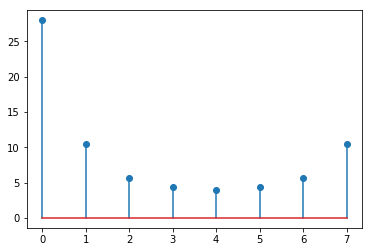

In [3]:
# Example:
N = 8  # vary this, and see the difference between even and odd N
x = np.arange(N)  # purely real
X = fft(x)  # N = len(x) by default
Xm = np.abs(X)
plt.stem(Xm)
Xm # circularly even

array([ 0.        ,  1.96349541,  2.35619449,  2.74889357,  3.14159265,
       -2.74889357, -2.35619449, -1.96349541])

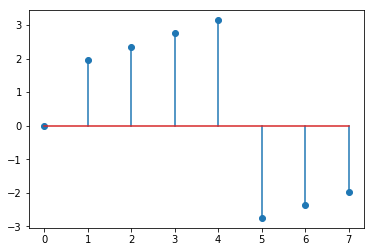

In [4]:
Xp = np.angle(X)
plt.stem(Xp)
Xp # circularly odd

In [5]:
# counter-example using a complex signal
x = np.exp(-1j * 2 * np.pi * np.arange(8) / 32)
X = fft(x)
np.abs(X)  # *not* circularly even

array([7.21411356, 1.50002477, 0.91474414, 0.73892463, 0.71052817,
       0.80177994, 1.11461896, 2.43590805])

In [6]:
np.angle(X)  # *not* circularly odd

array([-0.68722339, -0.29452431,  0.09817477,  0.49087385,  0.88357293,
        1.27627202,  1.6689711 ,  2.06167018])

Summary of symmetry properties:

![](Tbl7.1.png)

### 7.2.2. Multiplication of two DFTs and Circular Convolution

Given

$$ x_1[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_1[k] $$

and

$$ x_2[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_2[k] $$

Now let

$$ X_3[k] = X_1[k] \cdot X_2[k] $$

the IDFT of $X_3[k]$ is

$$ x_3[m] = \frac{1}{N} \sum_{k=0}^{N-1} X_3[k] e^{j 2 \pi k m / N} $$

$$ = \frac{1}{N} \sum_{k=0}^{N-1} X_1[k] \cdot X_2[k] e^{j 2 \pi k m / N} $$

$$ = \frac{1}{N} \sum_{k=0}^{N-1} 
\left(
\sum_{n=0}^{N-1} x_1[n] e^{-j 2 \pi k n / N}
\right)
\left(
\sum_{l=0}^{N-1} x_2[l] e^{-j 2 \pi k l / N}
\right)
e^{j 2 \pi k m / N} $$

$$ = \frac{1}{N} 
\sum_{n=0}^{N-1} x_1[n] 
\sum_{l=0}^{N-1} x_2[l] 
\sum_{k=0}^{N-1} e^{j 2 \pi k (m - n - l) / N} $$

$$ = \frac{1}{N} 
\sum_{n=0}^{N-1} x_1[n] 
\sum_{l=0}^{N-1} x_2[l] 
\left(
\sum_{k=0}^{N-1} (e^{j 2 \pi (m - n - l) / N})^k 
\right)
$$

The term is parenthesis is a geometric series where $a$ is defined as  

$$ a = e^{j 2 \pi (m - n - l) / N} $$

We observe that $a=1$ when $m-n-l$ is a multiple of $N$; on the other hand, $a^N = 1$ (and the resulting fraction is zero) otherwise and thus

$$ \sum_{k=0}^{N-1} a^k = \begin{cases}
N, & m - n - l = pN \rightarrow l = m - n - pN = m - n \mod N \\
0, & \textrm{otherwise}
\end{cases} $$

Substituting back into the original equation:

$$ x_3[m] = \sum_{n=0}^{N-1} x_1[n] x_2[m-n \mod N] $$

This expression is called *circular* convolution, because of the modulus. In conclusion, the multiplication of the DFTs of two sequences is equivalent to circular convolution of the sequences in time domain.

Circular convolution involves the same four steps as ordinary linear convolution:

1. folding (time-reversing)
1. shifting
1. multiplying
1. summing

The fundamental difference is that in circular convolution the folding and shifting operations are perfromed in a circular fashion by computing the index modulo $N$.

In [7]:
# Example 7.2.1: perform circular convolution

N = 4
x1 = np.r_[2, 1, 2, 1]
x2 = np.r_[1, 2, 3, 4]

assert (len(x1) == N) and (len(x2) == N)

n = np.arange(N)
x3 = np.array([sum(x1[n] * x2[(m - n) % N]) for m in range(N)])
x3

array([14, 16, 14, 16])

In [8]:
# Example 7.2.2

X1 = fft(x1)
X2 = fft(x2)
X3 = X1 * X2
x3 = ifft(X3)
x3

array([14.+0.j, 16.+0.j, 14.+0.j, 16.+0.j])

In [9]:
x3 = ifft(X3).real  # because floating point imprecision create small imaginary parts
x3

array([14., 16., 14., 16.])

In [10]:
# or use the fft that assumes real signals: rfft
X1 = rfft(x1)
X2 = rfft(x2)
X3 = X1 * X2
x3 = irfft(X3)
x3

array([14., 16., 14., 16.])

Formally, given

$$ x_1[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_1[k] $$

and

$$ x_2[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_2[k] $$

then

$$ x_1[n] \stackrel{N}{\circledast} x_2[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_1[k]X_2[k] $$


### 7.2.3. Additional DFT Properties
#### Time Reversal

If 

$$ x[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] $$

then

$$ x[-n \mod N] = x[N-n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[-k \mod N] = X[N-k] $$


Proof:

$$ X[k] = \sum_{n=0}^{N-1} x[N-n] e^{-j 2 \pi k n / N} $$

Let $m=N-n$ (and thus $n=N-m$):

$$ = \sum_{m=1}^{N} x[m] e^{-j 2 \pi k (N-m) / N} $$

$$ = \sum_{m=0}^{N-1} x[m] e^{-j 2 \pi k (N - m) / N} $$

$$ = \sum_{m=0}^{N-1} x[m] e^{j 2 \pi k m / N} $$

$$ = \sum_{m=0}^{N-1} x[m] e^{-j 2 \pi (N - k) m / N} $$

$$ = X[N-k] $$

In [11]:
f = np.r_[0, 1, 2, 3, 4, 5, 6, 7]
N = len(f)

F = fft(f)
print(f"{f} <--> \n{F}")

b = np.array([f[-i % N] for i in range(N)])  # note b != f[::-1]
B = fft(b)
print(f"{b} <--> \n{B}")

B2 = np.array([F[-i % N] for i in range(N)])
assert np.allclose(B, B2)

[0 1 2 3 4 5 6 7] <--> 
[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
[0 7 6 5 4 3 2 1] <--> 
[28.+0.j         -4.-9.65685425j -4.-4.j         -4.-1.65685425j
 -4.+0.j         -4.+1.65685425j -4.+4.j         -4.+9.65685425j]


#### Circular time shift

If 

$$ x[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] $$

then

$$ x[n - l \mod N] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] e^{-j 2 \pi k l / N} $$

Proof:

$$ X[k] = \sum_{n=0}^{N-1} x[n - l \mod N] e^{-j 2 \pi k n / N} $$

$$ = \sum_{n=0}^{l-1} x[n - l \mod N] e^{-j 2 \pi k n / N} +
\sum_{n=l}^{N-1} x[n - l \mod N] e^{-j 2 \pi k n / N} $$

$$ = \sum_{n=0}^{l-1} x[n - l + N] e^{-j 2 \pi k n / N} +
\sum_{n=l}^{N-1} x[n - l] e^{-j 2 \pi k n / N} $$

$$ = \sum_{m=N-l}^{N-1} x[m] e^{-j 2 \pi k (m+l-N) / N} +
\sum_{m=0}^{N-l-1} x[m] e^{-j 2 \pi k (m + l) / N} $$

$$ = \sum_{m=0}^{N-1} x[m] e^{-j 2 \pi k (m+l) / N} $$

$$ = \left( \sum_{m=0}^{N-1} x[m] e^{-j 2 \pi k m / N} \right) 
e^{-j 2 \pi k l / N} $$

$$ = X[k] e^{-j 2 \pi k l / N} $$


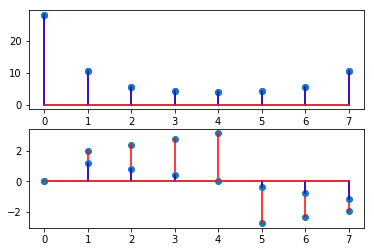

In [12]:
N = 8
x = np.arange(N)
X = fft(x)

shift = 1
x2 = np.roll(x, shift)
X2 = fft(x2)

plt.subplot(211)
plt.stem(abs(X), linefmt='r')
plt.stem(abs(X2), linefmt='b')
plt.subplot(212)
plt.stem(np.angle(X), linefmt='r')
plt.stem(np.angle(X2), linefmt='b')

assert np.allclose(X2, X * np.exp(-1j * 2 * np.pi * np.arange(N) * shift / N))

#### Circular frequency shift

If 

$$ x[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] $$

then

$$ x[n] e^{j 2 \pi l n / N} \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k-l \mod N]  $$

The multiplication of the sequence $x[n]$ with the complex exponential sequence $e^{j 2 \pi l n / N}$ is equivalent to the circular shift of the DFT by $l$ units in frequency.

#### Complex-conjugate properties

If 

$$ x[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] $$

then

$$ x^*[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X^*[-k \mod N] $$

and

$$ x^*[-n \mod N] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X^*[k] $$

#### Circular correlation
If 

$$ x[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] $$

and

$$ y[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} Y[k] $$

then

$$ \tilde{r}_{xy}[l] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} \tilde{R}_{xy}[k] = X[k] Y^*[k] $$

where $\tilde{r}_{xy}[l]$ is the unnormalized circular crosscorrelation sequence

$$ \tilde{r}_{xy}[l] = \sum_{k=0}^{N-1} x[n] y^*[n - l \mod N] $$

Recall that we can also write

$$ \tilde{r}_{xy}[l] = x[l] \stackrel{N}{\circledast} y*[-l \mod N] $$

and thus the proof is similar to the one for circular convolution.

#### Multiplication
If 

$$ x_1[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_1[k] $$

and

$$ x_2[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X_2[k] $$

then

$$ x_1[n] x_2[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} 
\frac{1}{N} X_1[k] \stackrel{N}{\circledast} X_2[k] $$

#### Parseval's Theorem
If 

$$ x[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} X[k] $$

and

$$ y[n] \stackrel{N-\textrm{DFT}}{\longleftrightarrow} Y[k] $$

then

$$ \sum_{n=0}^{N-1} x[n] y^*[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] Y^*[k] $$ 

Proof:

From the circular correlation property we have

$$ \tilde{r}_{xy}[0] = \sum_{k=0}^{N-1} x[n] y^*[n] $$

and taking the IDFT of 

$$ \tilde{R}_{xy}[k] = X[k] Y^{*}[k] $$

results in

$$ \tilde{r}_{xy}[l] = \frac{1}{N} \sum_{k=0}^{N-1} \tilde{R}_{xy}[k] e^{j 2 \pi k l / N} $$

$$ = \frac{1}{N} \sum_{k=0}^{N-1} X[k] Y^*[k] e^{j 2 \pi k l / N} $$

and thus at $l=0$

$$ \tilde{r}_{xy}[0] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] Y^*[k] $$

When $x[n] = y[n]$

$$ \sum_{n=0}^{N-1} \left| x[n] \right|^2 = \frac{1}{N} \sum_{k=0}^{N-1} \left| X[k] \right|^2 $$

In [13]:
x = np.arange(8)
N = len(x)
X = fft(x)

assert np.allclose(np.sum(np.abs(x) ** 2), np.sum(np.abs(X) ** 2) / N)

Summary of properties:

![](Tbl7.2.png)